In [28]:
# prompt: 請以 J. W. TUKEY在1977年於Exploratory Data Analysis所發表的方式,計算scores.csv三個欄位:chinese, english, math 的離群值,並繪製盒鬚圖與常態分配圖
# uv init
# uv venv --python 3.10
# .venv\Scripts\activate
# pip install pandas, uv add pandas
# pip install numpy, uv add numpy
# pip install matplotlib , uv add matplotlib
# pip install seaborn, uv add seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the data
# Row No.,Passenger Class,Name,Sex,Age,No of Sibilings or Spouses on Board,No of Partners or Childern on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
folder="/"
df = pd.read_csv("Titanic3.csv")
df.info()
df.describe()

# # Define the function to find outliers using Tukey's method
# def find_outliers_tukey(data, column):
#     q1 = data[column].quantile(0.25)
#     q3 = data[column].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
#     return outliers, lower_bound, upper_bound

# # Columns to analyze
# # Passenger Class,Name,Sex,Age,No of Sibilings or Spouses on Board,No of Partners or Childern on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
# subjects = ["Age","Life Boat","Survived"]
# df_filtered = df.copy() # Create a copy to store filtered data

# # Analyze each subject and remove outliers
# for subject in subjects:
#     print(f"Analyzing {subject}:")
#     outliers, lower_bound, upper_bound = find_outliers_tukey(df, subject)
#     print(f"  Lower Bound: {lower_bound}")
#     print(f"  Upper Bound: {upper_bound}")
#     print(f"  Outliers for {subject}:\n{outliers}")
#     print("-" * 30)
#     # Remove outliers from the filtered DataFrame
#     df_filtered = df_filtered[(df_filtered[subject] >= lower_bound) & (df_filtered[subject] <= upper_bound)]


# print("\nData after removing outliers:")
# display(df_filtered)

#################################
# # Plotting Boxplots (using the original data to show outliers before removal)
# plt.figure(figsize=(15, 5))
# for i, subject in enumerate(subjects):
#     plt.subplot(1, 3, i + 1)
#     sns.boxplot(y=df[subject])
#     plt.title(f'Boxplot of {subject} (Original Data)')
# plt.tight_layout()
# plt.show()

# # Plotting Normal Distribution (Histograms with KDE) (using the filtered data)
# plt.figure(figsize=(15, 5))
# for i, subject in enumerate(subjects):
#     plt.subplot(1, 3, i + 1)
#     sns.histplot(df_filtered[subject], kde=True)
#     plt.title(f'Distribution of {subject} (Outliers Removed)')
#     plt.xlabel(subject)
#     plt.ylabel('Frequency')
#     plt.grid(True)
# plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Row No.                              1309 non-null   int64  
 1   Passenger Class                      1309 non-null   object 
 2   Name                                 1309 non-null   object 
 3   Sex                                  1309 non-null   object 
 4   Age                                  1046 non-null   float64
 5   No of Sibilings or Spouses on Board  1309 non-null   int64  
 6   No of Partners or Childern on Board  1309 non-null   int64  
 7   Ticket Number                        1309 non-null   object 
 8   Passenger Fare                       1309 non-null   object 
 9   Cabin                                295 non-null    object 
 10  Port of Embarkation                  1309 non-null   object 
 11  Life Boat                     

,Row No.,Age,No of Sibilings or Spouses on Board,No of Partners or Childern on Board
count,1309.000000,1046.000000,1309.000000,1309.000000
mean,655.000000,29.881135,0.498854,0.385027
std,378.020061,14.413500,1.041658,0.865560
min,1.000000,0.166700,0.000000,0.000000
25%,328.000000,21.000000,0.000000,0.000000
50%,655.000000,28.000000,0.000000,0.000000
75%,982.000000,39.000000,1.000000,0.000000
max,1309.000000,80.000000,8.000000,9.000000


In [25]:
#資料處理的相關工作
df = pd.read_csv('Titanic3.csv')
#df.head()
df
condition = df.isnull().any(axis='columns')
df[condition]


,Row No.,Passenger Class,Name,Sex,Age,No of Sibilings or Spouses on Board,No of Partners or Childern on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
2,3,First,"Allison, Miss. Helen Loraine",Female,2.0,1,2,113781,151.55,C22 C26,Southampton,NaN,No
3,4,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0,1,2,113781,151.55,C22 C26,Southampton,NaN,No
4,5,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0,1,2,113781,151.55,C22 C26,Southampton,NaN,No
7,8,First,"Andrews, Mr. Thomas Jr",Male,39.0,0,0,112050,0,A36,Southampton,NaN,No
9,10,First,"Artagaveytia, Mr. Ramon",Male,71.0,0,0,PC 17609,49.5042,NaN,Cherbourg,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,Third,"Zabour, Miss. Hileni",Female,14.5,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1305,1306,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1306,1307,Third,"Zakarian, Mr. Mapriededer",Male,26.5,0,0,2656,7.225,NaN,Cherbourg,NaN,No
1307,1308,Third,"Zakarian, Mr. Ortin",Male,27.0,0,0,2670,7.225,NaN,Cherbourg,NaN,No


In [26]:
#缺失值處理
df = pd.read_csv('Titanic3.csv')
df = df.dropna()
df

,Row No.,Passenger Class,Name,Sex,Age,No of Sibilings or Spouses on Board,No of Partners or Childern on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,1,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,2,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.55,C22 C26,Southampton,11,Yes
5,6,First,"Anderson, Mr. Harry",Male,48.0000,0,0,19952,26.55,E12,Southampton,3,Yes
6,7,First,"Andrews, Miss. Kornelia Theodosia",Female,63.0000,1,0,13502,77.9583,D7,Southampton,10,Yes
8,9,First,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",Female,53.0000,2,0,11769,51.4792,C101,Southampton,D,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,1027,Third,"Moor, Mrs. (Beila)",Female,27.0000,0,1,392096,12.475,E121,Southampton,14,Yes
1131,1132,Third,"Pickard, Mr. Berk (Berk Trembisky)",Male,32.0000,0,0,SOTON/O.Q. 392078,8.05,E10,Southampton,9,Yes
1187,1188,Third,"Sandstrom, Miss. Beatrice Irene",Female,1.0000,1,1,PP 9549,16.7,G6,Southampton,13,Yes
1188,1189,Third,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",Female,24.0000,0,2,PP 9549,16.7,G6,Southampton,13,Yes


✅ 清理後資料筆數: 1046
       Age  Survived
0  29.0000         1
1   0.9167         1
2   2.0000         0
3  30.0000         0
4  25.0000         0


C:\Users\ogzqd\AppData\Local\Temp\ipykernel_7796\713293258.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Survived'] = df['Survived'].replace({'yes': 1, 'no': 0})
d:\pythonrepo\pandas-matplot-libseaborn\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\pythonrepo\pandas-matplot-libseaborn\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\pythonrepo\pandas-matplot-libseaborn\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21542 (\N{CJK UNIFIE

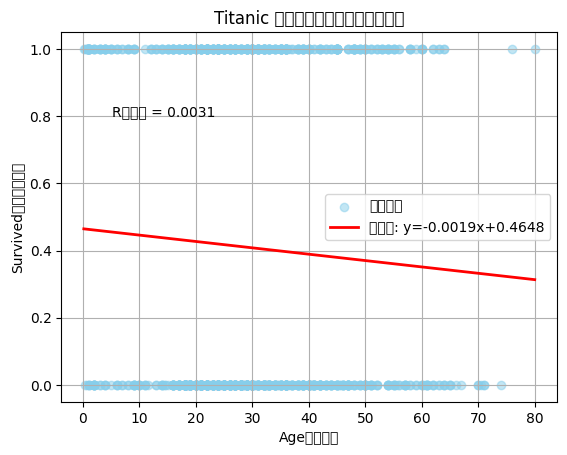

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ 讀取 Titanic3.csv
df = pd.read_csv("Titanic3.csv")

# 2️⃣ 取出 Age 與 Survived 欄位
df = df[['Age', 'Survived']].copy()

# 3️⃣ 處理空白與文字大小寫
df['Survived'] = df['Survived'].astype(str).str.strip().str.lower()

# 4️⃣ 轉換 Yes / No 成 1 / 0
df['Survived'] = df['Survived'].replace({'yes': 1, 'no': 0})

# 5️⃣ 轉換為數值型態並移除空值
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')
df = df.dropna(subset=['Age', 'Survived'])

print(f"✅ 清理後資料筆數: {len(df)}")
print(df.head())

# 6️⃣ 準備分析資料
x = df['Age'].to_numpy(dtype=float)
y = df['Survived'].to_numpy(dtype=float)

# 7️⃣ 繪製散點圖
plt.scatter(x, y, color='skyblue', alpha=0.5, label='原始資料')

# 8️⃣ 使用 polyfit 擬合一次線性趨勢線
degree = 1
coefficients = np.polyfit(x, y, degree)
poly = np.poly1d(coefficients)

# 9️⃣ 計算 R²
y_fit = poly(x)
residuals = y - y_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

# 🔟 繪製趨勢線
x_fit = np.linspace(min(x), max(x), 100)
y_fit_line = poly(x_fit)
plt.plot(x_fit, y_fit_line, color='red', linewidth=2,
         label=f'趨勢線: y={coefficients[0]:.4f}x+{coefficients[1]:.4f}')

# 🧠 顯示 R平方值
plt.text(min(x)+5, 0.8, f'R平方值 = {r_squared:.4f}', fontsize=10, color='black')

# 🎨 美化圖表
plt.title("Titanic 年齡與存活關係（含趨勢線）")
plt.xlabel("Age（年齡）")
plt.ylabel("Survived（是否存活）")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
import pandas as pd

df = pd.read_csv("Titanic3.csv")

print("📋 欄位名稱：", df.columns.tolist())

print("\n前 5 筆 Age / Survived 資料：")
print(df[['Age', 'Survived']].head(5))

print("\n每欄缺失值數量：")
print(df[['Age', 'Survived']].isnull().sum())

print("\n轉為數值後（非 NaN）資料數量：")
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')
print(df[['Age', 'Survived']].notnull().sum())

print("\n清理後資料筆數：", len(df.dropna(subset=['Age', 'Survived'])))


📋 欄位名稱： ['Row No.', 'Passenger Class', 'Name', 'Sex', 'Age', 'No of Sibilings or Spouses on Board', 'No of Partners or Childern on Board', 'Ticket Number', 'Passenger Fare', 'Cabin', 'Port of Embarkation', 'Life Boat', 'Survived']

前 5 筆 Age / Survived 資料：
       Age Survived
0  29.0000      Yes
1   0.9167      Yes
2   2.0000       No
3  30.0000       No
4  25.0000       No

每欄缺失值數量：
Age         263
Survived      0
dtype: int64

轉為數值後（非 NaN）資料數量：
Age         1046
Survived       0
dtype: int64

清理後資料筆數： 0


In [29]:
import pandas as pd

# 讀取資料
df = pd.read_csv("Titanic3.csv")

# 列出 Age、Cabin、Life Boat 欄位
cols = ['Name','Age', 'Cabin','Life Boat']

# 找出這三欄中「任一欄為空值」的資料列
missing_rows = df[df[cols].isnull().any(axis=1)]

# 顯示結果
print(f"共有 {len(missing_rows)} 筆資料在 Age、Cabin 或 Life Boat 有空值：")
print(missing_rows[cols].head(10))  # 只顯示前 10 筆
print(df[df['Age'].isnull()][['Name', 'Age', 'Cabin', 'Life Boat']].head())

共有 1127 筆資料在 Age、Cabin 或 Life Boat 有空值：
                                               Name   Age    Cabin Life Boat
2                      Allison, Miss. Helen Loraine   2.0  C22 C26       NaN
3              Allison, Mr. Hudson Joshua Creighton  30.0  C22 C26       NaN
4   Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0  C22 C26       NaN
7                            Andrews, Mr. Thomas Jr  39.0      A36       NaN
9                           Artagaveytia, Mr. Ramon  71.0      NaN       NaN
10                           Astor, Col. John Jacob  47.0  C62 C64       NaN
13                     Barber, Miss. Ellen "Nellie"  26.0      NaN         6
15                              Baumann, Mr. John D   NaN      NaN       NaN
16                         Baxter, Mr. Quigg Edmond  24.0  B58 B60       NaN
23                            Bidois, Miss. Rosalie  42.0      NaN         4
                                                 Name  Age Cabin Life Boat
15                                Baum

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Tukey 
# 讀取資料
df = pd.read_csv("Titanic3.csv")

# 清理資料
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age'])

# 畫 Tukey 的箱型圖
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Age'], color='skyblue')

plt.title("Tukey's Box-and-Whisker Plot - Age 分佈")
plt.xlabel("Age（年齡）")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


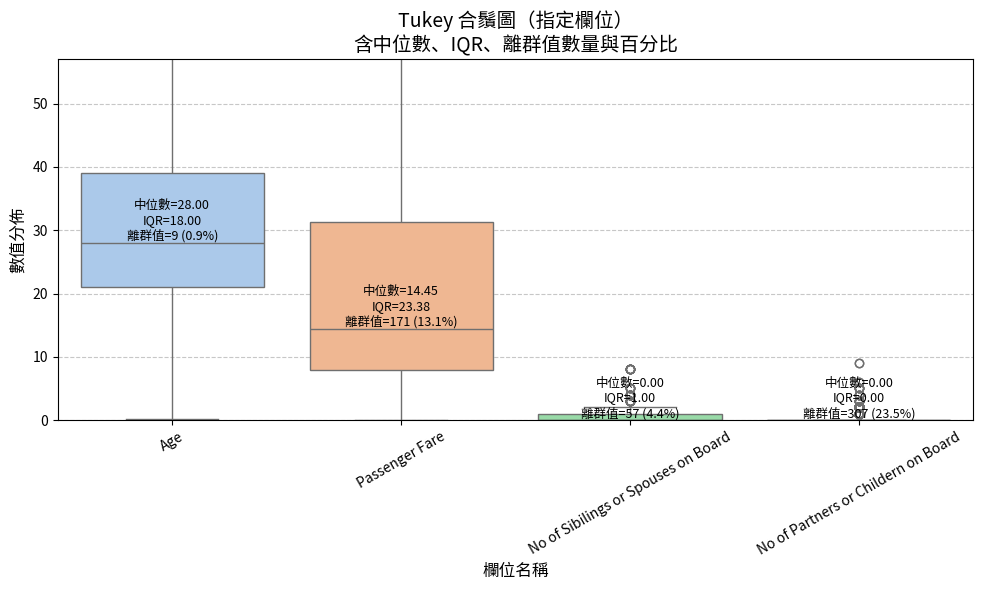

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import matplotlib.font_manager as fm

# 🈶 1️⃣ 設定中文字型（自動下載思源黑體）
font_url = "https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/SimplifiedChinese/NotoSansCJKsc-Regular.otf"
font_path = "NotoSansCJKsc-Regular.otf"

if not os.path.exists(font_path):
    import urllib.request
    print("📥 下載中文字型中 ...")
    urllib.request.urlretrieve(font_url, font_path)

fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Noto Sans CJK SC'
plt.rcParams['axes.unicode_minus'] = False  # 修正負號顯示

# 🧩 2️⃣ 讀取 Titanic3.csv
df = pd.read_csv("Titanic3.csv")

# 🧮 3️⃣ 嘗試將所有欄位轉成數值（非數值變 NaN）
df_numeric = df.apply(pd.to_numeric, errors='coerce')
df_numeric = df_numeric.dropna(axis=1, how='all')

# 🧠 4️⃣ 🔽 在這裡直接指定想要分析的欄位 🔽
cols_to_plot = ["Sex",'Age', 'Passenger Fare',"No of Sibilings or Spouses on Board","No of Partners or Childern on Board"]  # ← 自行修改這一行

# 只取出選定欄位（忽略不存在的欄位）
cols_to_plot = [c for c in cols_to_plot if c in df_numeric.columns]
df_selected = df_numeric[cols_to_plot].dropna(how='all')

if len(df_selected.columns) == 0:
    raise ValueError("⚠️ 選定的欄位在資料中不存在，請確認名稱拼寫正確。")

# 🧾 5️⃣ 計算統計值（中位數、IQR、離群值數量與百分比）
stats = []
for col in df_selected.columns:
    series = df_selected[col].dropna()
    if len(series) > 0:
        median = series.median()
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = series[(series < lower) | (series > upper)]
        outlier_count = len(outliers)
        total = len(series)
        outlier_percent = (outlier_count / total) * 100
        stats.append((col, median, iqr, outlier_count, outlier_percent))

# 🎯 6️⃣ 自動縮放 Y 軸（排除極端值）
y_min = np.percentile(df_selected.stack(), 5)
y_max = np.percentile(df_selected.stack(), 95)

# 📊 7️⃣ 繪圖
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_selected, palette='pastel')
plt.ylim(y_min, y_max)

# 🏷️ 8️⃣ 在圖上標註統計資訊
for i, (col, median, iqr, outlier_count, outlier_percent) in enumerate(stats):
    plt.text(i, median, 
             f"中位數={median:.2f}\nIQR={iqr:.2f}\n離群值={outlier_count} ({outlier_percent:.1f}%)",
             ha='center', va='bottom', fontsize=9, color='black')

# 🎨 9️⃣ 美化圖表
plt.title("Tukey 合鬚圖（指定欄位）\n含中位數、IQR、離群值數量與百分比", fontsize=14)
plt.xlabel("欄位名稱", fontsize=12)
plt.ylabel("數值分佈", fontsize=12)
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
